In [4]:
from odlpet.scanner.scanner import Scanner

In [102]:
class my_mct(Scanner):
    det_nx_mm = 4
    det_ny_mm = 2*10*0.2027
    num_rings = 4*13+3 # 1  or (4*13  + 3) # in crystals
    #print(ring_size)
    det_radius = 427.6
    average_depth_of_inter = 9.6
    ring_spacing = det_ny_mm
    voxel_size_xy = 4.07283 #one side, mm
    axial_crystals_per_block = num_rings
    trans_crystals_per_block = 13+1
    axial_blocks_per_bucket = 1
    trans_blocks_per_bucket = 4
    ring_size = 12*trans_blocks_per_bucket*trans_crystals_per_block
    num_dets_per_ring = ring_size

In [103]:
scanner = my_mct()

In [104]:
from odlpet.scanner.compression import Compression
c = Compression(scanner)
c.span_num =  11 #1
c.num_of_views= 168 
c.max_num_segments =  49 #0 #wrong name, this is the ring difference
c.num_non_arccor_bins = 400
c.data_arc_corrected = False

In [105]:
proj = c.get_projector()
print('domain\n{} \n\nrange\n{}'.format(proj.domain, proj.range))

domain
uniform_discr([   0.    , -354.3362, -354.3362], [ 220.943 ,  358.4091,  358.4091], (109, 175, 175), dtype='float32') 

range
uniform_discr([   0. ,    0. , -427.6], [ 621.    ,    3.1416,  427.6   ], (621, 168, 400), dtype='float32')


In [12]:
from pathlib import Path
data_path = Path() / 'kex_data'
listmode_path = data_path / 'KanylPET-LM-01.l'
sinogram_path = data_path / 'KanylPET-LM-01-0.s'

In [13]:
import numpy as np
with open(listmode_path.absolute(), 'rb') as file:
    limo_data = np.fromfile(file, dtype=np.int32)
with open(sinogram_path.absolute(), 'rb') as file:
    sino_data = np.fromfile(file, dtype=np.uint16)

In [14]:
sino_shape = (13+1, 621, 168, 400)
tof_michelogram = np.reshape(sino_data, sino_shape)
michelogram = np.sum(tof_michelogram, axis=0)
sinogram = np.sum(michelogram, axis=0)

In [15]:
import matplotlib.pyplot as plt

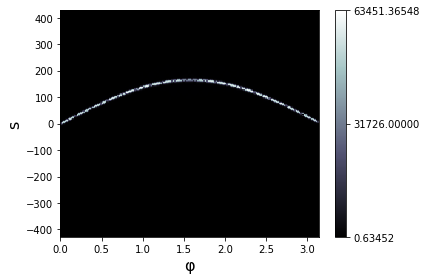

<Figure size 432x288 with 0 Axes>

In [16]:
proj_data = proj.range.element(sinogram)
proj_data.show(coords=(0, None, None));

In [17]:
import odl

In [18]:
mlem = odl.solvers.mlem

In [19]:
recon = proj.domain.one()

In [20]:
mlem(proj, recon, proj_data, niter=10)

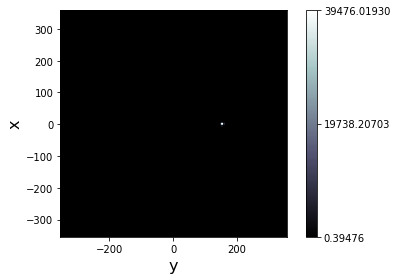

<Figure size 432x288 with 0 Axes>

In [21]:
recon.show(coords=(0,None,None), aspect='equal');

In [22]:
listmode_path = data_path / 'CylinderPET-LM-01.l'
sinogram_path = data_path / 'CylinderPET-LM-01-sino-0.s'

In [23]:
with open(listmode_path.absolute(), 'rb') as file:
    limo_data = np.fromfile(file, dtype=np.int32)
with open(sinogram_path.absolute(), 'rb') as file:
    sino_data = np.fromfile(file, dtype=np.uint16)

In [24]:
sino_shape = (13+1, 621, 168, 400)
tof_michelogram = np.reshape(sino_data, sino_shape)
michelogram = np.sum(tof_michelogram, axis=0)
sinogram = np.sum(michelogram, axis=0)

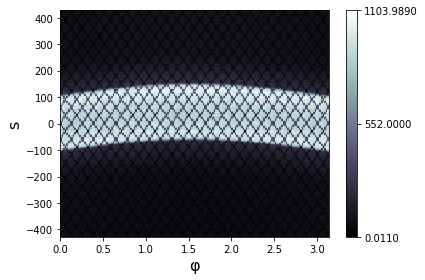

<Figure size 432x288 with 0 Axes>

In [25]:
proj_data = proj.range.element(sinogram)
proj_data.show(coords=(0, None, None));

In [26]:
mlem = odl.solvers.mlem

In [27]:
recon = proj.domain.one()

In [28]:
mlem(proj, recon, proj_data, niter=10)

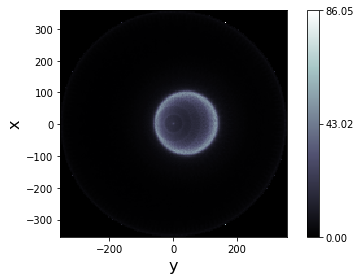

<Figure size 432x288 with 0 Axes>

In [29]:
recon.show(coords=(0,None,None), aspect='equal');

In [106]:
sinogram_path = data_path / 'CylinderPET-01-sino-norm_00.s'

In [107]:
with open(sinogram_path.absolute(), 'rb') as file:
    sino_data = np.fromfile(file, dtype=np.float32)

In [108]:
sino_shape = (621, 168, 400)
print("ratio", len(sino_data) / np.prod(sino_shape))
michelogram = np.reshape(sino_data, sino_shape)
sinogram = np.sum(michelogram, axis=0)

ratio 1.0


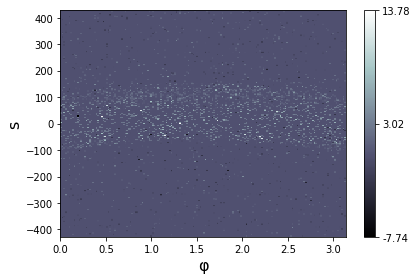

<Figure size 432x288 with 0 Axes>

In [109]:
proj_data = proj.range.element(michelogram)
proj_data.show(coords=(0, None, None));

In [110]:
mlem = odl.solvers.mlem

In [116]:
recon = proj.domain.one()

In [117]:
mlem(proj, recon, proj_data, niter=3)

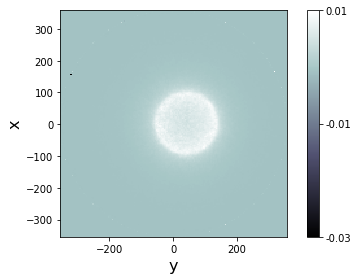

<Figure size 432x288 with 0 Axes>

In [154]:
recon.show(coords=(3*2*13,None,None), aspect='equal');